<a href="https://colab.research.google.com/github/jestfulfalcon/ML-Code_gfg/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
path="/content/drive/MyDrive/dataset/data_for_lr.csv"

In [12]:
data=pd.read_csv(path)

In [13]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [15]:
data.isnull().sum()

,0
x,0
y,1


**Data Processing**

In [16]:
data=data.dropna()
print('Shape of data : ' , data.shape)

Shape of data :  (699, 2)


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


**Splitting Data**

In [18]:
# training input and output
train_input=np.array(data.x[0:500]) # data mein x ki first 500 rows
train_input=np.array(data.x[0:500]).reshape(500,1)
train_output=np.array(data.y[0:500]).reshape(500,1)
# train_input


In [19]:
# validation data input and output
test_input=np.array(data.x[500:700]).reshape(199,1)
test_output=np.array(data.y[500:699]).reshape(199,1)


**Linear Regression**

**1. FORWAD PROPOGATION**

In [20]:
# f(x) = m*x + c
def forward(train_input , parameters) :
  m = parameters['m']
  c = parameters['c']

  predictions = np.multiply(m,train_input) + c

  return predictions


**Cost Function**

In [21]:
# cost =summation(1/2n(f(x)-y)^2)

def cost_function( predictions , train_output):
  cost = np.mean(( train_output - predictions )**2)*0.5

  return cost


**Gradient descent**

In [22]:
# df = (f(x) - y)/n  d(cost)/dm = df * df/dm
# dm = df * x
# dc = df * 1

In [23]:
def backward_propagation(train_input , train_output , predictions):

  derivatives = dict()
  df = np.mean(predictions - train_output)
  dm = np.multiply(train_input , df)
  dc = df

  derivatives['dm'] = dm
  derivatives['dc'] = dc

  return derivatives



**Update Parameters**

In [24]:
# m = m - (learning_rate*dm)
# c = c - (learning_rate*dc)


In [25]:
def update_parameters(parameters , derivatives , learning_rate):
  parameters['m'] = parameters['m'] - learning_rate*derivatives['dm']
  parameters['c'] = parameters['c'] - learning_rate*derivatives['dc']

  return parameters


**Model Training**

In [29]:
def train(train_input , train_output , learning_rate , iters):
  # random parameters
  parameters = dict()
  parameters['m'] = np.random.uniform(0.1)
  parameters['c'] = np.random.uniform(0.1)

  plt.figure()

  loss = list()

  # iterations
  for i in range(iters):

    predictions = forward(train_input , parameters) # forward propogation

    cost = cost_function( predictions , train_output) # cost function
    loss.append(cost)
    print(f"Iterations = {i+1} , Loss = {cost}")

    #plot

    fig,ax = plt.subplots()

    ax.plot(train_input , train_output , "+" , label = "Original")
    ax.plot(train_input , predictions , "*" , label = "Training")

    legend = ax.legend()
    plt.plot(train_input , train_output , "+" , label = "Original")
    plt.plot(train_input , predictions , "*" , label = "Training")
    plt.show()


    derivatives = backward_propagation(train_input , train_output , predictions)

    parameters = update_parameters(parameters , derivatives , learning_rate)

  return parameters , loss


Iterations = 1 , Loss = 1235.390108368795


<Figure size 640x480 with 0 Axes>

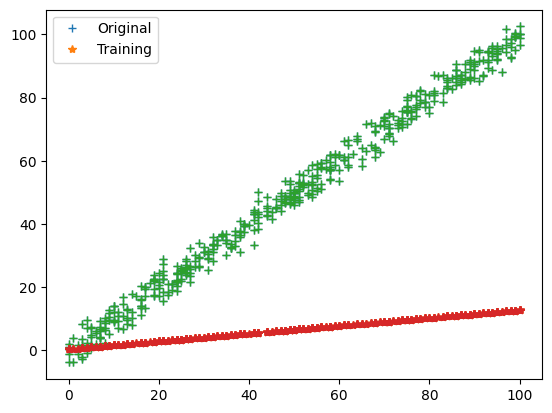

Iterations = 2 , Loss = 506.3320466533119


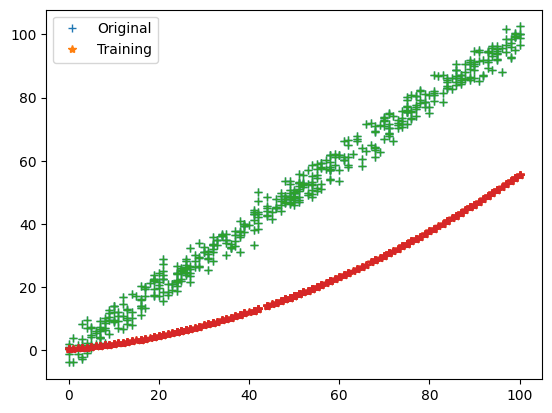

Iterations = 3 , Loss = 217.6639603255454


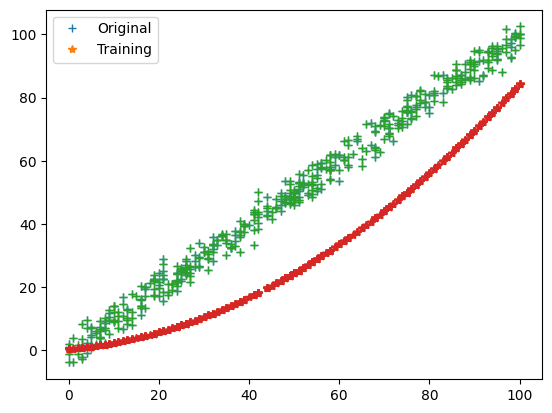

Iterations = 4 , Loss = 115.04872837225984


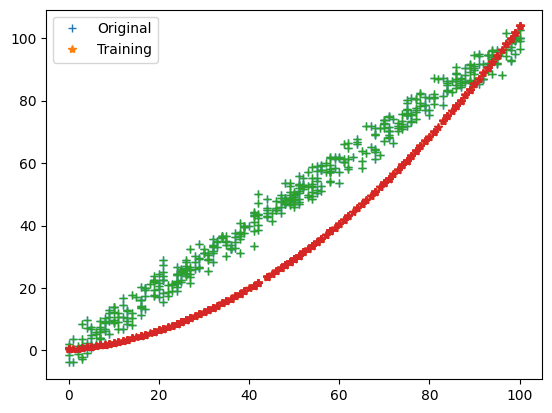

Iterations = 5 , Loss = 87.58661862260433


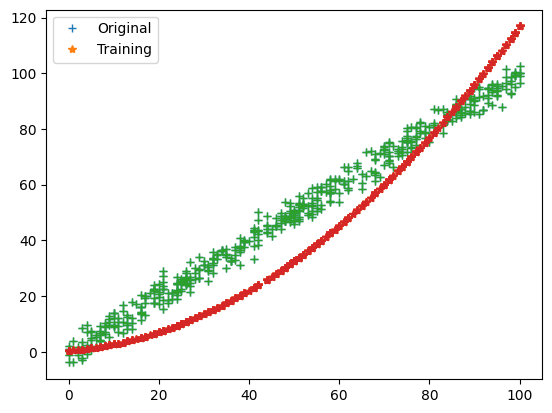

Iterations = 6 , Loss = 87.98670512987486


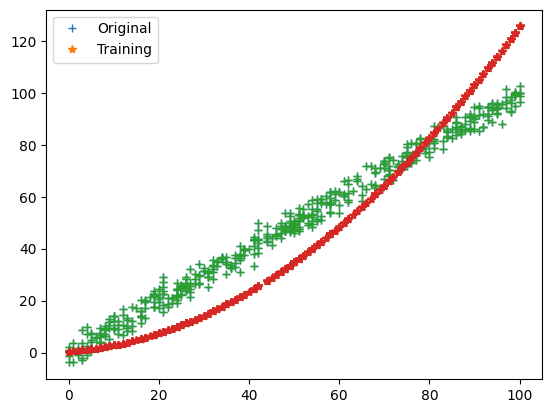

Iterations = 7 , Loss = 96.82919534536546


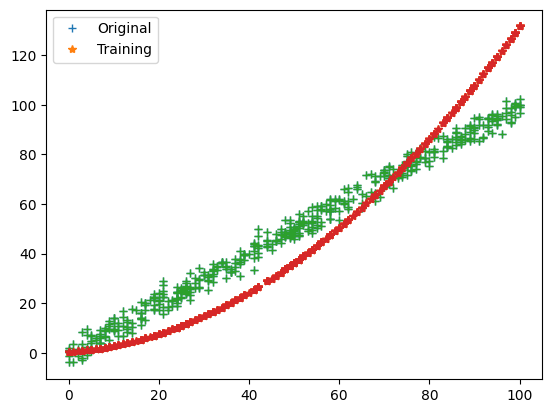

Iterations = 8 , Loss = 106.67433317550973


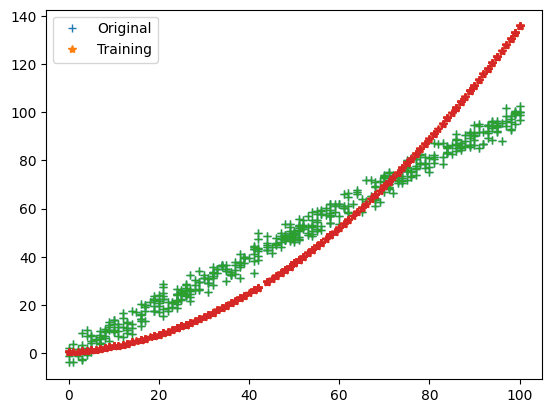

Iterations = 9 , Loss = 115.06995328165783


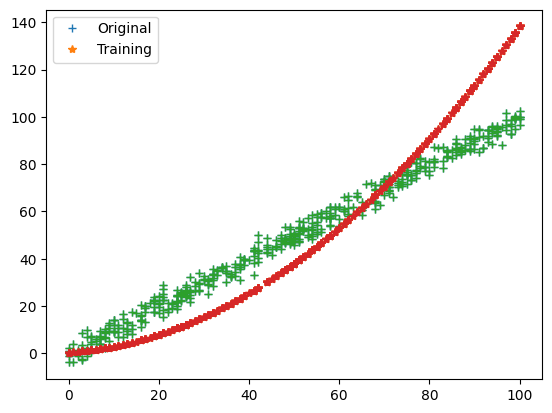

Iterations = 10 , Loss = 121.52527898517874


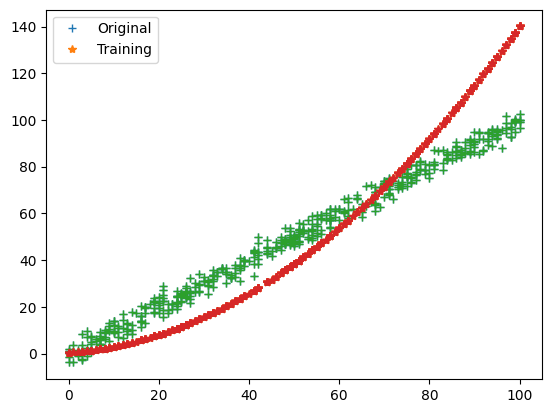

Iterations = 11 , Loss = 126.2363993641399


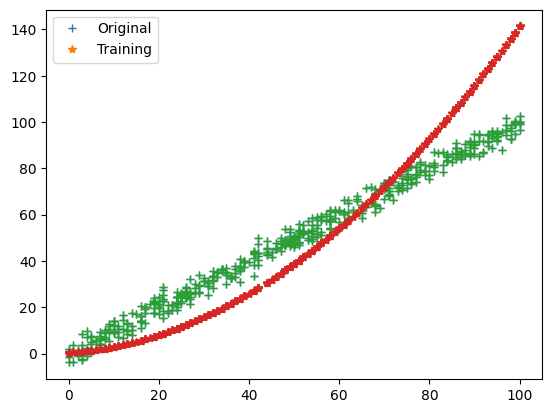

Iterations = 12 , Loss = 129.57431405824485


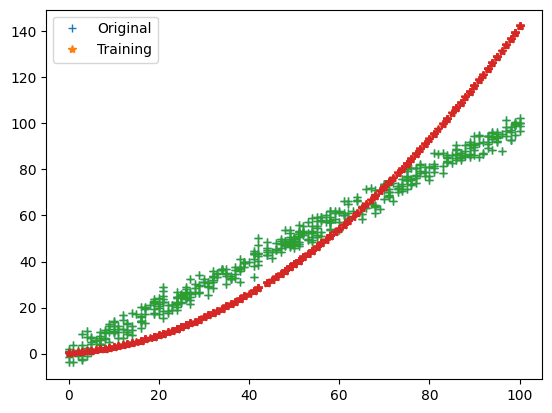

Iterations = 13 , Loss = 131.89730127185823


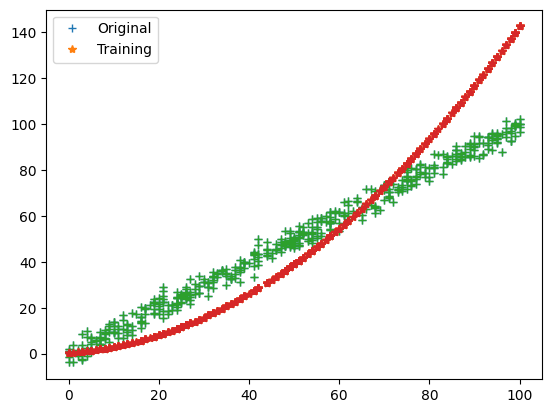

Iterations = 14 , Loss = 133.49585256677298


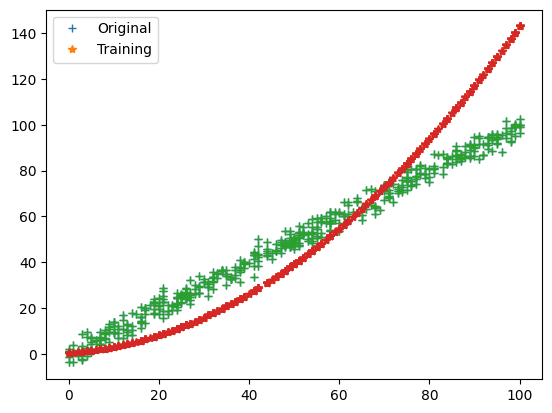

Iterations = 15 , Loss = 134.58793660602691


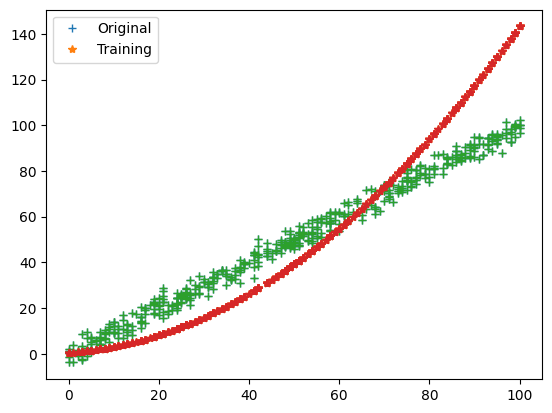

Iterations = 16 , Loss = 135.3304864673609


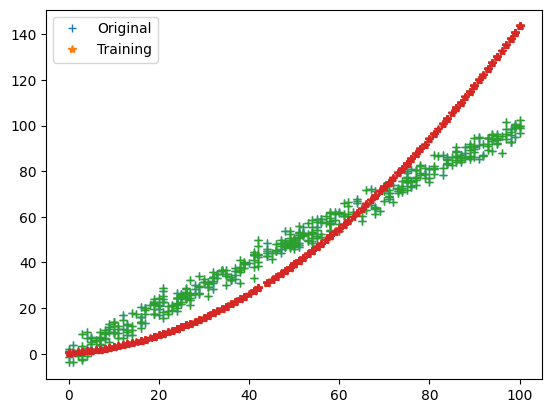

Iterations = 17 , Loss = 135.83379556182197


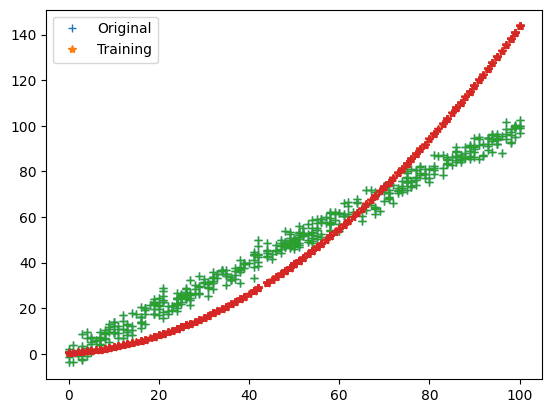

Iterations = 18 , Loss = 136.1742347939989


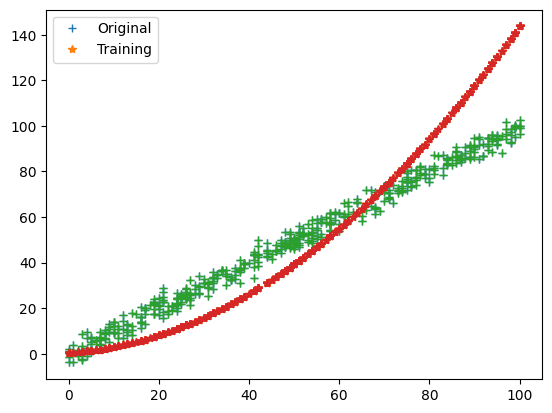

Iterations = 19 , Loss = 136.40418862710098


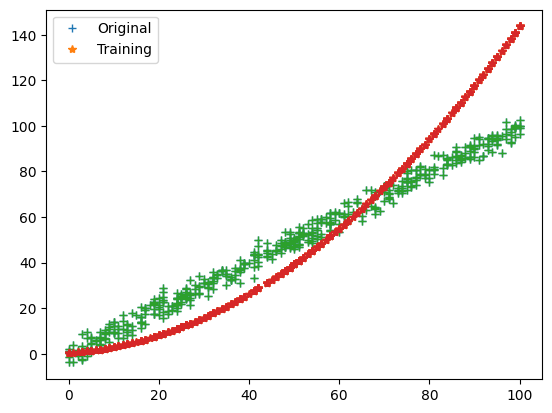

Iterations = 20 , Loss = 136.55936922748384


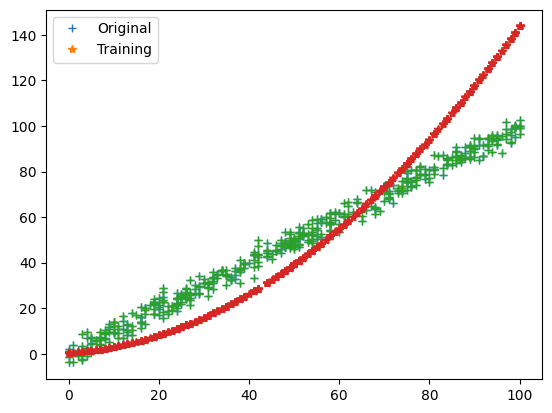

In [34]:
parameters , loaa = train(train_input , train_output , 0.0001 , 20)


In [38]:
print(parameters)

{'m': array([[0.4381735 ],
       [0.778779  ],
       [0.32027159],
       [0.62157646],
       [1.26348683],
       [0.59537604],
       [0.28097096],
       [1.18488556],
       [0.45127371],
       [0.18926947],
       [0.3333718 ],
       [0.3333718 ],
       [0.4381735 ],
       [0.63467667],
       [0.83117985],
       [0.90978112],
       [0.46437392],
       [1.08008387],
       [0.50367455],
       [0.52987498],
       [1.01458281],
       [1.26348683],
       [0.88358069],
       [0.83117985],
       [1.2241862 ],
       [0.88358069],
       [0.76567879],
       [0.38577265],
       [1.30278747],
       [0.75257858],
       [0.17616926],
       [0.45127371],
       [0.67397731],
       [0.12376842],
       [0.90978112],
       [1.3420881 ],
       [0.63467667],
       [0.2154699 ],
       [0.39887286],
       [1.01458281],
       [1.2241862 ],
       [0.12376842],
       [0.88358069],
       [0.37267244],
       [0.59537604],
       [0.37267244],
       [0.8966809 ],
       

In [36]:
print(parameters)

{'m': array([[0.4381735 ],
       [0.778779  ],
       [0.32027159],
       [0.62157646],
       [1.26348683],
       [0.59537604],
       [0.28097096],
       [1.18488556],
       [0.45127371],
       [0.18926947],
       [0.3333718 ],
       [0.3333718 ],
       [0.4381735 ],
       [0.63467667],
       [0.83117985],
       [0.90978112],
       [0.46437392],
       [1.08008387],
       [0.50367455],
       [0.52987498],
       [1.01458281],
       [1.26348683],
       [0.88358069],
       [0.83117985],
       [1.2241862 ],
       [0.88358069],
       [0.76567879],
       [0.38577265],
       [1.30278747],
       [0.75257858],
       [0.17616926],
       [0.45127371],
       [0.67397731],
       [0.12376842],
       [0.90978112],
       [1.3420881 ],
       [0.63467667],
       [0.2154699 ],
       [0.39887286],
       [1.01458281],
       [1.2241862 ],
       [0.12376842],
       [0.88358069],
       [0.37267244],
       [0.59537604],
       [0.37267244],
       [0.8966809 ],
       

**SKLEARN**

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lr_model = LinearRegression()

In [41]:
lr_model.fit(train_input , train_output ) # training the model

LinearRegression()

In [42]:
lr_model.coef_ # value of m

array([[1.0009993]])

In [43]:
lr_model.intercept_

array([-0.23603461])

**Prediction**

In [44]:
test_predictions = lr_model.predict(test_input)

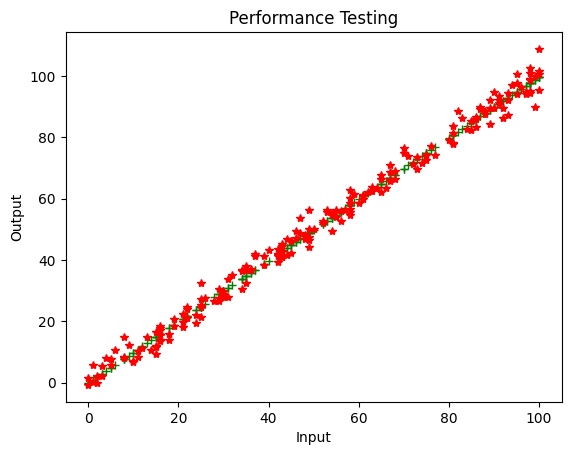

In [45]:
plt.plot(test_input , test_predictions , "+" , color='green')
plt.plot(test_input , test_output , "*" , color='red')
plt.title('Performance Testing')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()




**Cost finding**

In [46]:
from sklearn.metrics import mean_squared_error

In [48]:
cost = mean_squared_error(test_output , test_predictions)
cost

8.030031591835378